In [1]:
!pip install --upgrade pip
!pip install wfdb tensorflow scikit-learn seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [wfdb]buf]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.29.5 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.

In [2]:
import wfdb

# Download the MIT-BIH Atrial Fibrillation Database
print("📥 Downloading dataset... this may take a few minutes.")
wfdb.dl_database('afdb', 'mit-bih-atrial-fibrillation-database-1.0.0')
print("✅ Dataset downloaded successfully!")

📥 Downloading dataset... this may take a few minutes.
Generating record list for: 00735
Generating record list for: 03665
Generating record list for: 04015
Generating record list for: 04043
Generating record list for: 04048
Generating record list for: 04126
Generating record list for: 04746
Generating record list for: 04908
Generating record list for: 04936
Generating record list for: 05091
Generating record list for: 05121
Generating record list for: 05261
Generating record list for: 06426
Generating record list for: 06453
Generating record list for: 06995
Generating record list for: 07162
Generating record list for: 07859
Generating record list for: 07879
Generating record list for: 07910
Generating record list for: 08215
Generating record list for: 08219
Generating record list for: 08378
Generating record list for: 08405
Generating record list for: 08434
Generating record list for: 08455
Generating list of all files for: 00735
Generating list of all files for: 03665
Generating list 

CNN + BiLSTM for AFib Detection
MIT-BIH Atrial Fibrillation Database (PhysioNet)

✅ Dataset directory 'mit-bih-atrial-fibrillation-database-1.0.0' found.

1. Loading MIT-BIH AFDB data...
Loading records from mit-bih-atrial-fibrillation-database-1.0.0...
  04015: 9823 segments extracted
  04043: 9823 segments extracted
  04048: 9823 segments extracted
  04126: 9823 segments extracted
  04746: 9823 segments extracted
  04908: 9823 segments extracted
  04936: 9823 segments extracted
  05091: 9823 segments extracted
  05121: 9823 segments extracted
  05261: 9823 segments extracted
  06426: 9823 segments extracted
  06453: 8883 segments extracted
  06995: 9823 segments extracted
  07162: 9823 segments extracted
  07859: 9823 segments extracted
  07879: 9823 segments extracted
  07910: 9823 segments extracted
  08215: 9823 segments extracted
  08219: 9823 segments extracted
  08378: 9823 segments extracted
  08405: 9823 segments extracted
  08434: 9823 segments extracted
  08455: 9823 segmen

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763034604.952024      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1875, 64)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1875, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 625, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 625, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 625, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 625, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 312, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 312, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 312, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 312, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 156, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 156, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 156, 256)       │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 156, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,954 (2.77 MB)

 Trainable params: 724,802 (2.76 MB)

 Non-trainable params: 1,152 (4.50 KB)


4. Training model...

Starting training...
Epoch 1/100


I0000 00:00:1763034616.413038     138 cuda_dnn.cc:529] Loaded cuDNN version 90300


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7597 - auc: 0.8384 - loss: 0.4732 - precision: 0.7597 - recall: 0.7597
Epoch 1: val_accuracy improved from -inf to 0.93089, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 171s 65ms/step - accuracy: 0.7597 - auc: 0.8384 - loss: 0.4731 - precision: 0.7597 - recall: 0.7597 - val_accuracy: 0.9309 - val_auc: 0.9841 - val_loss: 0.1737 - val_precision: 0.9309 - val_recall: 0.9309 - learning_rate: 0.0010
Epoch 2/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9286 - auc: 0.9820 - loss: 0.1648 - precision: 0.9286 - recall: 0.9286
Epoch 2: val_accuracy improved from 0.93089 to 0.94133, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 160s 65ms/step - accuracy: 0.9286 - auc: 0.9820 - loss: 0.1648 - precision: 0.9286 - recall: 0.9286 - val_accuracy: 0.9413 - val_auc: 0.9841 - val_loss: 0.1725 - val_precision: 0.9413 - val_recall: 0.9413 - learning_rate: 0.0010
Epoch 3/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9471 - auc: 0.9888 - loss: 0.1291 - precision: 0.9471 - recall: 0.9471
Epoch 3: val_accuracy did not improve from 0.94133
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 159s 65ms/step - accuracy: 0.9471 - auc: 0.9888 - loss: 0.1291 - precision: 0.9471 - recall: 0.9471 - val_accuracy: 0.9041 - val_auc: 0.9731 - val_loss: 0.2266 - val_precision: 0.9041 - val_recall: 0.9041 - learning_rate: 0.0010
Epoch 4/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9462 - auc: 0.9891 - loss: 0.1230 - precision: 0.9462 - recall: 0.9462
Epoch 4: val_accuracy improved from 0.94133 to 0.95898, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 159s 65ms/step - accuracy: 0.9462 - auc: 0.9891 - loss: 0.1230 - precision: 0.9462 - recall: 0.9462 - val_accuracy: 0.9590 - val_auc: 0.9923 - val_loss: 0.1120 - val_precision: 0.9590 - val_recall: 0.9590 - learning_rate: 0.0010
Epoch 5/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9578 - auc: 0.9916 - loss: 0.1073 - precision: 0.9578 - recall: 0.9578
Epoch 5: val_accuracy did not improve from 0.95898
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9578 - auc: 0.9916 - loss: 0.1073 - precision: 0.9578 - recall: 0.9578 - val_accuracy: 0.9577 - val_auc: 0.9896 - val_loss: 0.1327 - val_precision: 0.9577 - val_recall: 0.9577 - learning_rate: 0.0010
Epoch 6/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9641 - auc: 0.9931 - loss: 0.0947 - precision: 0.9641 - recall: 0.9641
Epoch 6: val_accuracy did not improve from 0.95898
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9641 - auc: 0.9931 - loss: 0.0947 - 

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9641 - auc: 0.9940 - loss: 0.0883 - precision: 0.9641 - recall: 0.9641 - val_accuracy: 0.9698 - val_auc: 0.9948 - val_loss: 0.0840 - val_precision: 0.9698 - val_recall: 0.9698 - learning_rate: 0.0010
Epoch 8/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9634 - auc: 0.9939 - loss: 0.0892 - precision: 0.9634 - recall: 0.9634
Epoch 8: val_accuracy did not improve from 0.96978
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9634 - auc: 0.9939 - loss: 0.0892 - precision: 0.9634 - recall: 0.9634 - val_accuracy: 0.9536 - val_auc: 0.9941 - val_loss: 0.0916 - val_precision: 0.9536 - val_recall: 0.9536 - learning_rate: 0.0010
Epoch 9/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9692 - auc: 0.9952 - loss: 0.0777 - precision: 0.9692 - recall: 0.9692
Epoch 9: val_accuracy improved from 0.96978 to 0.97871, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9692 - auc: 0.9952 - loss: 0.0777 - precision: 0.9692 - recall: 0.9692 - val_accuracy: 0.9787 - val_auc: 0.9970 - val_loss: 0.0599 - val_precision: 0.9787 - val_recall: 0.9787 - learning_rate: 0.0010
Epoch 10/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9719 - auc: 0.9956 - loss: 0.0726 - precision: 0.9719 - recall: 0.9719
Epoch 10: val_accuracy did not improve from 0.97871
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9719 - auc: 0.9956 - loss: 0.0726 - precision: 0.9719 - recall: 0.9719 - val_accuracy: 0.9700 - val_auc: 0.9956 - val_loss: 0.0792 - val_precision: 0.9700 - val_recall: 0.9700 - learning_rate: 0.0010
Epoch 11/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9729 - auc: 0.9961 - loss: 0.0687 - precision: 0.9729 - recall: 0.9729
Epoch 11: val_accuracy did not improve from 0.97871
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9729 - auc: 0.9961 - loss: 0.068

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9778 - auc: 0.9971 - loss: 0.0551 - precision: 0.9778 - recall: 0.9778 - val_accuracy: 0.9838 - val_auc: 0.9979 - val_loss: 0.0493 - val_precision: 0.9838 - val_recall: 0.9838 - learning_rate: 0.0010
Epoch 18/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9779 - auc: 0.9971 - loss: 0.0558 - precision: 0.9779 - recall: 0.9779
Epoch 18: val_accuracy did not improve from 0.98378
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9779 - auc: 0.9971 - loss: 0.0558 - precision: 0.9779 - recall: 0.9779 - val_accuracy: 0.9820 - val_auc: 0.9975 - val_loss: 0.0530 - val_precision: 0.9820 - val_recall: 0.9820 - learning_rate: 0.0010
Epoch 19/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9811 - auc: 0.9977 - loss: 0.0480 - precision: 0.9811 - recall: 0.9811
Epoch 19: val_accuracy did not improve from 0.98378
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9811 - auc: 0.9977 - loss: 0.048

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9811 - auc: 0.9979 - loss: 0.0465 - precision: 0.9811 - recall: 0.9811 - val_accuracy: 0.9840 - val_auc: 0.9982 - val_loss: 0.0414 - val_precision: 0.9840 - val_recall: 0.9840 - learning_rate: 0.0010
Epoch 27/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9818 - auc: 0.9979 - loss: 0.0447 - precision: 0.9818 - recall: 0.9818
Epoch 27: val_accuracy did not improve from 0.98400
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9818 - auc: 0.9979 - loss: 0.0447 - precision: 0.9818 - recall: 0.9818 - val_accuracy: 0.9736 - val_auc: 0.9969 - val_loss: 0.0658 - val_precision: 0.9736 - val_recall: 0.9736 - learning_rate: 0.0010
Epoch 28/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9820 - auc: 0.9981 - loss: 0.0434 - precision: 0.9820 - recall: 0.9820
Epoch 28: val_accuracy did not improve from 0.98400
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9820 - auc: 0.9981 - loss: 0.043

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9882 - auc: 0.9989 - loss: 0.0282 - precision: 0.9882 - recall: 0.9882 - val_accuracy: 0.9849 - val_auc: 0.9982 - val_loss: 0.0407 - val_precision: 0.9849 - val_recall: 0.9849 - learning_rate: 5.0000e-04
Epoch 40/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9871 - auc: 0.9988 - loss: 0.0297 - precision: 0.9871 - recall: 0.9871
Epoch 40: val_accuracy improved from 0.98489 to 0.98515, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9871 - auc: 0.9988 - loss: 0.0297 - precision: 0.9871 - recall: 0.9871 - val_accuracy: 0.9852 - val_auc: 0.9981 - val_loss: 0.0416 - val_precision: 0.9852 - val_recall: 0.9852 - learning_rate: 5.0000e-04
Epoch 41/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9880 - auc: 0.9988 - loss: 0.0282 - precision: 0.9880 - recall: 0.9880
Epoch 41: val_accuracy did not improve from 0.98515
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9880 - auc: 0.9988 - loss: 0.0282 - precision: 0.9880 - recall: 0.9880 - val_accuracy: 0.9851 - val_auc: 0.9980 - val_loss: 0.0409 - val_precision: 0.9851 - val_recall: 0.9851 - learning_rate: 5.0000e-04
Epoch 42/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9882 - auc: 0.9989 - loss: 0.0283 - precision: 0.9882 - recall: 0.9882
Epoch 42: val_accuracy improved from 0.98515 to 0.98613, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9882 - auc: 0.9989 - loss: 0.0283 - precision: 0.9882 - recall: 0.9882 - val_accuracy: 0.9861 - val_auc: 0.9984 - val_loss: 0.0383 - val_precision: 0.9861 - val_recall: 0.9861 - learning_rate: 5.0000e-04
Epoch 43/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9879 - auc: 0.9990 - loss: 0.0279 - precision: 0.9879 - recall: 0.9879
Epoch 43: val_accuracy improved from 0.98613 to 0.98747, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9879 - auc: 0.9990 - loss: 0.0279 - precision: 0.9879 - recall: 0.9879 - val_accuracy: 0.9875 - val_auc: 0.9983 - val_loss: 0.0378 - val_precision: 0.9875 - val_recall: 0.9875 - learning_rate: 5.0000e-04
Epoch 44/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9887 - auc: 0.9990 - loss: 0.0269 - precision: 0.9887 - recall: 0.9887
Epoch 44: val_accuracy did not improve from 0.98747
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 156s 64ms/step - accuracy: 0.9887 - auc: 0.9990 - loss: 0.0269 - precision: 0.9887 - recall: 0.9887 - val_accuracy: 0.9851 - val_auc: 0.9981 - val_loss: 0.0429 - val_precision: 0.9851 - val_recall: 0.9851 - learning_rate: 5.0000e-04
Epoch 45/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9882 - auc: 0.9989 - loss: 0.0270 - precision: 0.9882 - recall: 0.9882
Epoch 45: val_accuracy did not improve from 0.98747
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9882 - auc: 0.9989 - los

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9889 - auc: 0.9990 - loss: 0.0266 - precision: 0.9889 - recall: 0.9889 - val_accuracy: 0.9876 - val_auc: 0.9983 - val_loss: 0.0368 - val_precision: 0.9876 - val_recall: 0.9876 - learning_rate: 5.0000e-04
Epoch 47/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9895 - auc: 0.9990 - loss: 0.0250 - precision: 0.9895 - recall: 0.9895
Epoch 47: val_accuracy did not improve from 0.98760
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 156s 64ms/step - accuracy: 0.9895 - auc: 0.9990 - loss: 0.0250 - precision: 0.9895 - recall: 0.9895 - val_accuracy: 0.9861 - val_auc: 0.9979 - val_loss: 0.0419 - val_precision: 0.9861 - val_recall: 0.9861 - learning_rate: 5.0000e-04
Epoch 48/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9893 - auc: 0.9990 - loss: 0.0259 - precision: 0.9893 - recall: 0.9893
Epoch 48: val_accuracy did not improve from 0.98760
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 156s 63ms/step - accuracy: 0.9893 - auc: 0.9990 - los

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9905 - auc: 0.9992 - loss: 0.0242 - precision: 0.9905 - recall: 0.9905 - val_accuracy: 0.9881 - val_auc: 0.9982 - val_loss: 0.0380 - val_precision: 0.9881 - val_recall: 0.9881 - learning_rate: 5.0000e-04
Epoch 51/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9904 - auc: 0.9991 - loss: 0.0242 - precision: 0.9904 - recall: 0.9904
Epoch 51: val_accuracy improved from 0.98809 to 0.98831, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9904 - auc: 0.9991 - loss: 0.0242 - precision: 0.9904 - recall: 0.9904 - val_accuracy: 0.9883 - val_auc: 0.9984 - val_loss: 0.0371 - val_precision: 0.9883 - val_recall: 0.9883 - learning_rate: 5.0000e-04
Epoch 52/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9890 - auc: 0.9990 - loss: 0.0259 - precision: 0.9890 - recall: 0.9890
Epoch 52: val_accuracy did not improve from 0.98831
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 156s 64ms/step - accuracy: 0.9890 - auc: 0.9990 - loss: 0.0259 - precision: 0.9890 - recall: 0.9890 - val_accuracy: 0.9865 - val_auc: 0.9982 - val_loss: 0.0397 - val_precision: 0.9865 - val_recall: 0.9865 - learning_rate: 5.0000e-04
Epoch 53/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9893 - auc: 0.9990 - loss: 0.0265 - precision: 0.9893 - recall: 0.9893
Epoch 53: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 53: val_accuracy did not improve from 0.98831
2461/2

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9918 - auc: 0.9993 - loss: 0.0208 - precision: 0.9918 - recall: 0.9918 - val_accuracy: 0.9885 - val_auc: 0.9981 - val_loss: 0.0384 - val_precision: 0.9885 - val_recall: 0.9885 - learning_rate: 2.5000e-04
Epoch 58/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9915 - auc: 0.9994 - loss: 0.0197 - precision: 0.9915 - recall: 0.9915
Epoch 58: val_accuracy improved from 0.98853 to 0.98898, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9915 - auc: 0.9994 - loss: 0.0197 - precision: 0.9915 - recall: 0.9915 - val_accuracy: 0.9890 - val_auc: 0.9984 - val_loss: 0.0358 - val_precision: 0.9890 - val_recall: 0.9890 - learning_rate: 2.5000e-04
Epoch 59/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9923 - auc: 0.9993 - loss: 0.0191 - precision: 0.9923 - recall: 0.9923
Epoch 59: val_accuracy improved from 0.98898 to 0.99040, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9923 - auc: 0.9993 - loss: 0.0191 - precision: 0.9923 - recall: 0.9923 - val_accuracy: 0.9904 - val_auc: 0.9984 - val_loss: 0.0349 - val_precision: 0.9904 - val_recall: 0.9904 - learning_rate: 2.5000e-04
Epoch 60/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9922 - auc: 0.9994 - loss: 0.0188 - precision: 0.9922 - recall: 0.9922
Epoch 60: val_accuracy did not improve from 0.99040
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9922 - auc: 0.9994 - loss: 0.0188 - precision: 0.9922 - recall: 0.9922 - val_accuracy: 0.9876 - val_auc: 0.9984 - val_loss: 0.0379 - val_precision: 0.9876 - val_recall: 0.9876 - learning_rate: 2.5000e-04
Epoch 61/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9926 - auc: 0.9994 - loss: 0.0180 - precision: 0.9926 - recall: 0.9926
Epoch 61: val_accuracy did not improve from 0.99040
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9926 - auc: 0.9994 - los

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 157s 64ms/step - accuracy: 0.9936 - auc: 0.9995 - loss: 0.0157 - precision: 0.9936 - recall: 0.9936 - val_accuracy: 0.9906 - val_auc: 0.9983 - val_loss: 0.0341 - val_precision: 0.9906 - val_recall: 0.9906 - learning_rate: 2.5000e-04
Epoch 71/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9937 - auc: 0.9994 - loss: 0.0153 - precision: 0.9937 - recall: 0.9937
Epoch 71: val_accuracy did not improve from 0.99058
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9937 - auc: 0.9994 - loss: 0.0153 - precision: 0.9937 - recall: 0.9937 - val_accuracy: 0.9893 - val_auc: 0.9986 - val_loss: 0.0340 - val_precision: 0.9893 - val_recall: 0.9893 - learning_rate: 2.5000e-04
Epoch 72/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9927 - auc: 0.9994 - loss: 0.0166 - precision: 0.9927 - recall: 0.9927
Epoch 72: val_accuracy improved from 0.99058 to 0.99107, saving model to best_afib_model.h5


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 158s 64ms/step - accuracy: 0.9927 - auc: 0.9994 - loss: 0.0166 - precision: 0.9927 - recall: 0.9927 - val_accuracy: 0.9911 - val_auc: 0.9984 - val_loss: 0.0320 - val_precision: 0.9911 - val_recall: 0.9911 - learning_rate: 2.5000e-04
Epoch 73/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9937 - auc: 0.9995 - loss: 0.0159 - precision: 0.9937 - recall: 0.9937
Epoch 73: val_accuracy did not improve from 0.99107
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 159s 64ms/step - accuracy: 0.9937 - auc: 0.9995 - loss: 0.0159 - precision: 0.9937 - recall: 0.9937 - val_accuracy: 0.9884 - val_auc: 0.9981 - val_loss: 0.0371 - val_precision: 0.9884 - val_recall: 0.9884 - learning_rate: 2.5000e-04
Epoch 74/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9933 - auc: 0.9995 - loss: 0.0158 - precision: 0.9933 - recall: 0.9933
Epoch 74: val_accuracy did not improve from 0.99107
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 160s 65ms/step - accuracy: 0.9933 - auc: 0.9995 - los

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 161s 65ms/step - accuracy: 0.9948 - auc: 0.9996 - loss: 0.0125 - precision: 0.9948 - recall: 0.9948 - val_accuracy: 0.9913 - val_auc: 0.9983 - val_loss: 0.0328 - val_precision: 0.9913 - val_recall: 0.9913 - learning_rate: 1.2500e-04
Epoch 82/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9944 - auc: 0.9996 - loss: 0.0128 - precision: 0.9944 - recall: 0.9944
Epoch 82: val_accuracy did not improve from 0.99133
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 161s 65ms/step - accuracy: 0.9944 - auc: 0.9996 - loss: 0.0128 - precision: 0.9944 - recall: 0.9944 - val_accuracy: 0.9906 - val_auc: 0.9983 - val_loss: 0.0338 - val_precision: 0.9906 - val_recall: 0.9906 - learning_rate: 1.2500e-04
Epoch 83/100
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9946 - auc: 0.9996 - loss: 0.0131 - precision: 0.9946 - recall: 0.9946
Epoch 83: val_accuracy did not improve from 0.99133
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 161s 65ms/step - accuracy: 0.9946 - auc: 0.9996 - los

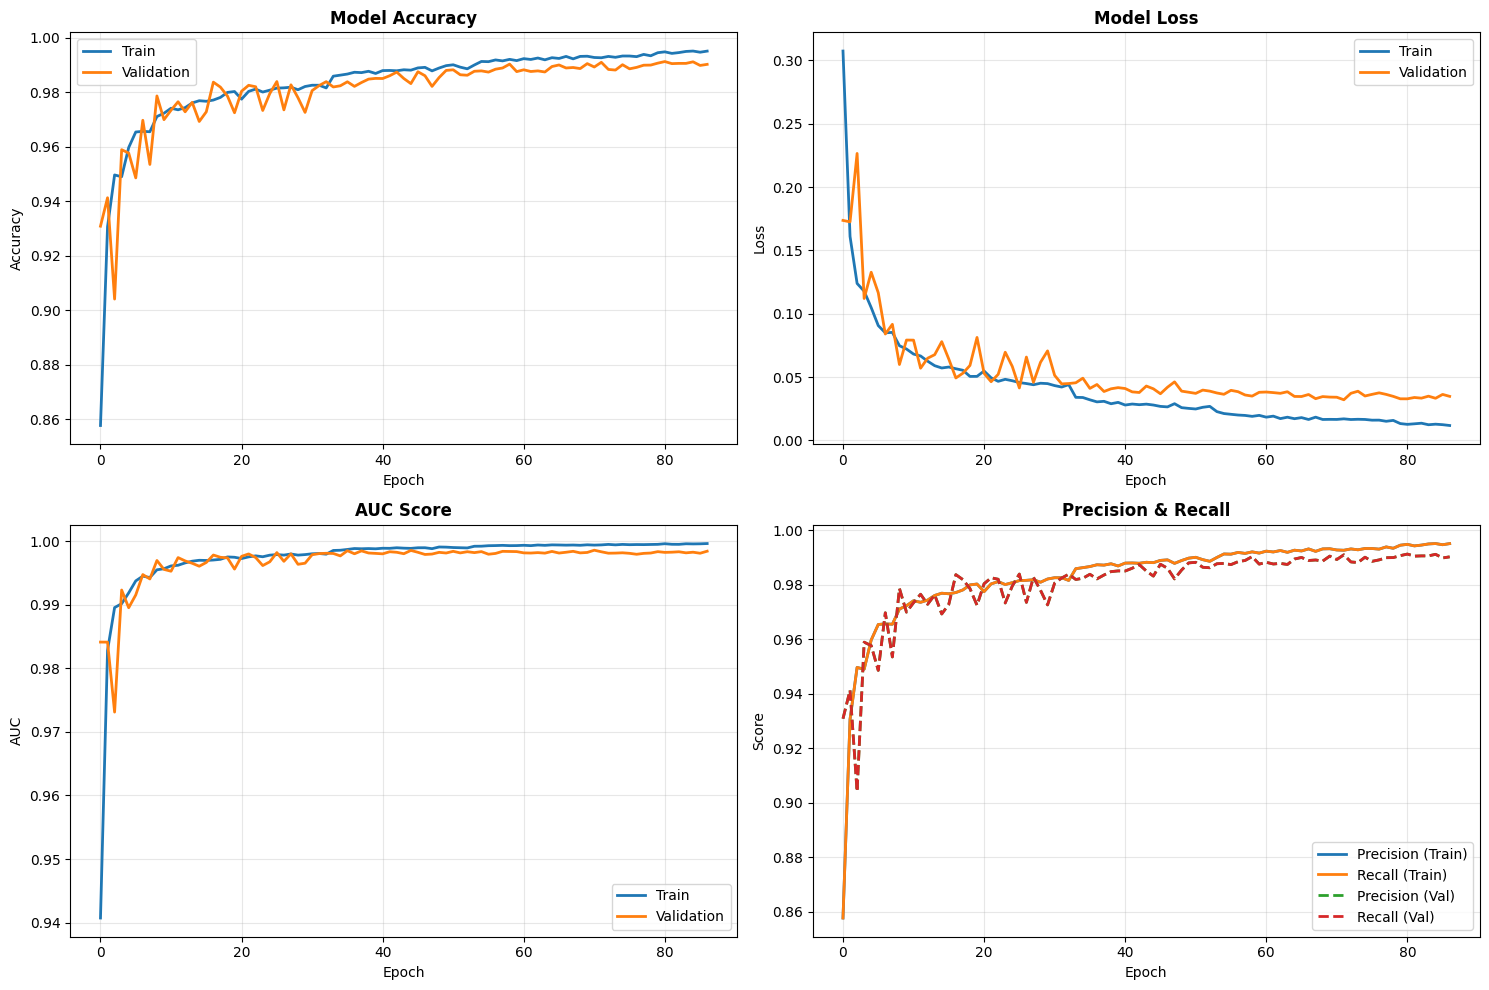


6. Evaluating model on test set...

MODEL EVALUATION RESULTS

Test Accuracy: 99.09%

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9975    0.9912    0.9944     36513
        AFib     0.9631    0.9895    0.9761      8485

    accuracy                         0.9909     44998
   macro avg     0.9803    0.9903    0.9852     44998
weighted avg     0.9910    0.9909    0.9909     44998



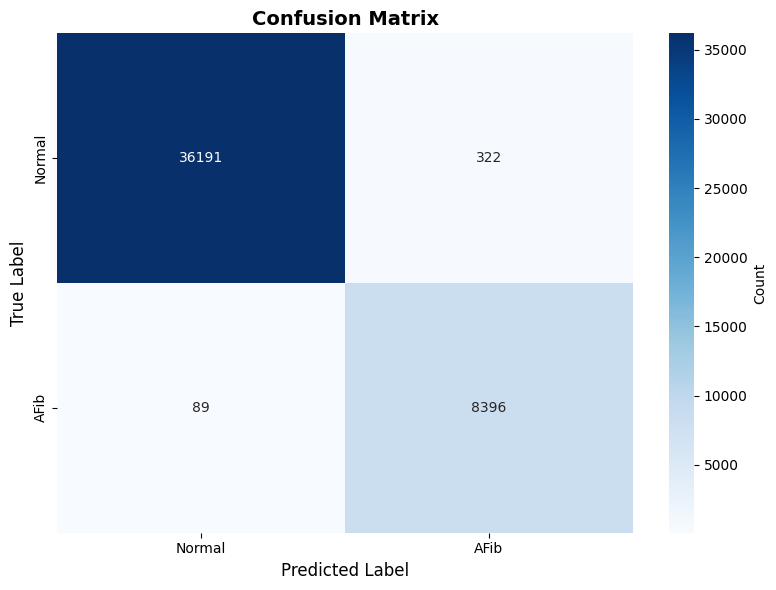

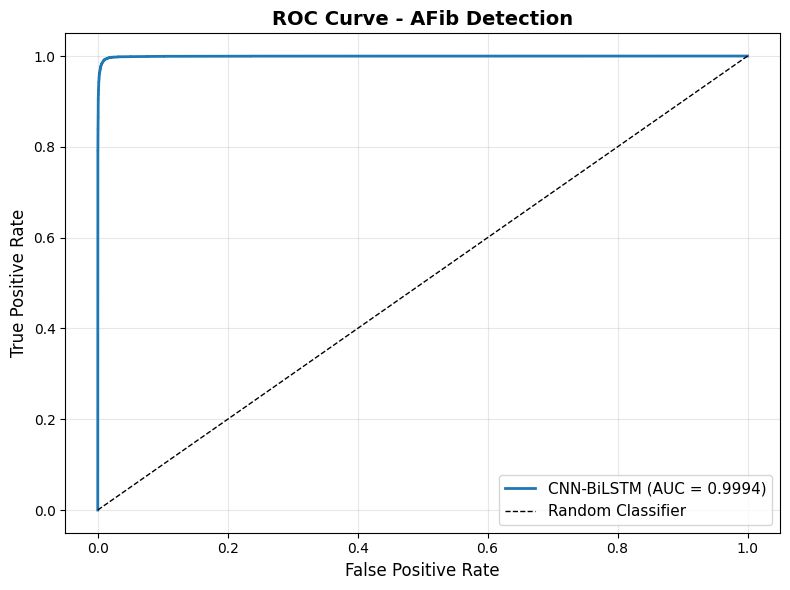


AUC Score: 0.9994

7. Visualizing sample predictions...


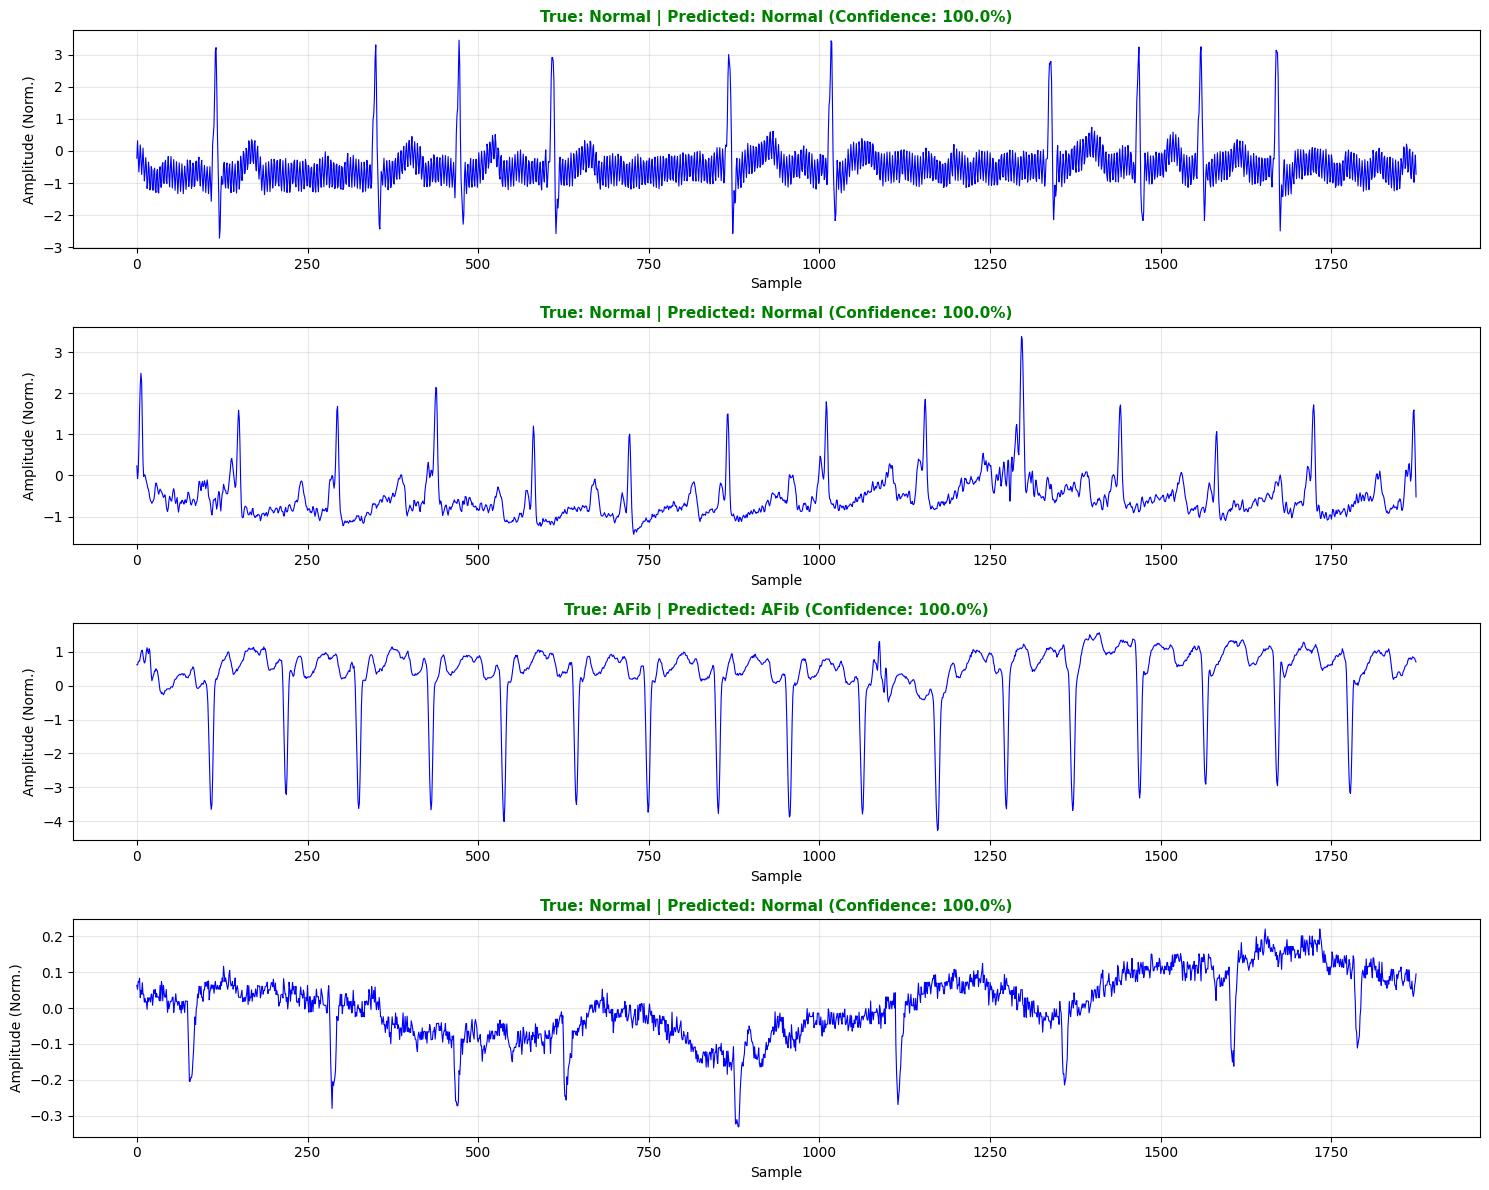


8. Saving model...
Model saved as 'afib_cnn_bilstm_final.h5'

TRAINING COMPLETE!
Data Mode: REAL
Final Test Accuracy: 99.09%


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import wfdb
import os
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ==========================================
# 1. DATA LOADING FROM PHYSIONET AFDB
# ==========================================

def load_physionet_afdb(data_dir='afdb/1.0.0/', segment_length=1875, overlap=0.5):
    """
    Load MIT-BIH Atrial Fibrillation Database from PhysioNet
    
    Parameters:
    -----------
    data_dir : str
        Directory containing the AFDB files
    segment_length : int
        Length of each ECG segment (default: 1875 = 7.5 seconds at 250 Hz)
    overlap : float
        Overlap ratio between segments (0 to 1)
    
    Returns:
    --------
    X : numpy array of ECG segments
    y : numpy array of labels (0: Normal, 1: AFib)
    """
    
    # Record names from AFDB (Standard subset used in many studies)
    # The actual downloaded directory name is 'mit-bih-atrial-fibrillation-database-1.0.0'
    # We adjust data_dir handling inside the function for robustness
    record_names = [
        '04015', '04043', '04048', '04126', '04746', '04908', '04936',
        '05091', '05121', '05261', '06426', '06453', '06995', '07162',
        '07859', '07879', '07910', '08215', '08219', '08378', '08405',
        '08434', '08455'
    ]
    
    X_segments = []
    y_labels = []
    
    print(f"Loading records from {data_dir}...")
    
    # Correcting data_dir path to the expected downloaded location
    # Note: If you downloaded to 'mit-bih-atrial-fibrillation-database-1.0.0', 
    # the actual records are in that root folder.
    
    for record_name in record_names:
        # Use only the record name, assuming wfdb handles the path correctly or the files are in data_dir
        # Since dl_database saves directly into the specified folder, we adjust the path
        record_path = os.path.join(data_dir, record_name)
        
        try:
            # Read ECG signal and annotations
            record = wfdb.rdrecord(record_path)
            annotation = wfdb.rdann(record_path, 'atr')  # rhythm annotations
            
            # Use first ECG lead
            ecg_signal = record.p_signal[:, 0]
            
            # Get rhythm annotations
            rhythm_labels = annotation.aux_note
            rhythm_samples = annotation.sample
            
            # Create segment-wise labels
            segments, labels = segment_ecg_with_rhythm(
                ecg_signal, 
                rhythm_samples, 
                rhythm_labels,
                segment_length,
                overlap
            )
            
            X_segments.extend(segments)
            y_labels.extend(labels)
            
            print(f"  {record_name}: {len(segments)} segments extracted")
            
        except Exception as e:
            print(f"  Error loading {record_name}. Check data path or file integrity: {e}")
            continue
    
    X = np.array(X_segments)
    y = np.array(y_labels)
    
    # Print class distribution
    counter = Counter(y)
    print(f"\nTotal segments: {len(y)}")
    print(f"Class distribution - Normal (0): {counter[0]}, AFib (1): {counter[1]}")
    
    return X, y

def segment_ecg_with_rhythm(ecg_signal, rhythm_samples, rhythm_labels, 
                             segment_length=1875, overlap=0.5):
    """
    Segment ECG signal with rhythm-based labeling
    """
    segments = []
    labels = []
    
    step_size = int(segment_length * (1 - overlap))
    
    # Create a rhythm map for the entire signal
    rhythm_map = np.zeros(len(ecg_signal), dtype=int)
    
    for i in range(len(rhythm_samples) - 1):
        start_idx = rhythm_samples[i]
        end_idx = rhythm_samples[i + 1]
        
        # Label: 1 for AFIB, 0 for others (N, AFL, J)
        # Note: (AFIB is a common string in the AFDB annotations)
        if '(AFIB' in rhythm_labels[i]:
            rhythm_map[start_idx:end_idx] = 1
        
    # Extract segments
    for start in range(0, len(ecg_signal) - segment_length + 1, step_size):
        end = start + segment_length
        segment = ecg_signal[start:end]
        
        # Determine label based on majority rhythm in segment
        segment_rhythms = rhythm_map[start:end]
        label = 1 if np.mean(segment_rhythms) > 0.5 else 0
        
        segments.append(segment)
        labels.append(label)
    
    return segments, labels

def create_demo_data():
    """
    Create synthetic data for demonstration if AFDB not available
    """
    print("\nCreating synthetic AFib data for demonstration...")
    
    n_samples = 4000 # Reduced for faster demo
    segment_length = 1875  # 7.5 seconds at 250 Hz
    
    X = []
    y = []
    
    # Normal rhythm: regular patterns (Class 0)
    for _ in range(int(n_samples * 0.6)): # 60% Normal
        t = np.linspace(0, 7.5, segment_length)
        signal = np.zeros(segment_length)
        for beat in np.arange(0, 7.5, 0.8): # Regular 75 BPM
            peak_idx = int(beat * 250)
            if peak_idx < segment_length:
                # Simple QRS complex simulation
                qrs_amp = np.exp(-0.1 * np.arange(40)[:min(segment_length-max(0, peak_idx-10), 40)])
                signal[max(0, peak_idx-10):min(segment_length, peak_idx+30)] += qrs_amp
        
        signal += np.random.randn(segment_length) * 0.05
        X.append(signal)
        y.append(0)
    
    # AFib: irregular patterns (Class 1)
    for _ in range(int(n_samples * 0.4)): # 40% AFib
        t = np.linspace(0, 7.5, segment_length)
        signal = np.zeros(segment_length)
        
        # Irregular heartbeats (variable RR intervals)
        beat_time = 0
        while beat_time < 7.5:
            rr_interval = np.random.uniform(0.4, 1.2)  # Irregular
            beat_time += rr_interval
            peak_idx = int(beat_time * 250)
            if peak_idx < segment_length:
                # Simple QRS complex simulation
                qrs_amp = np.exp(-0.1 * np.arange(40)[:min(segment_length-max(0, peak_idx-10), 40)])
                signal[max(0, peak_idx-10):min(segment_length, peak_idx+30)] += qrs_amp
        
        # Add fibrillatory waves (noise)
        signal += 0.1 * np.sin(2 * np.pi * 6 * t) + np.random.randn(segment_length) * 0.1
        
        X.append(signal)
        y.append(1)
    
    X = np.array(X)
    y = np.array(y)
    
    counter = Counter(y)
    print(f"Total synthetic segments: {len(y)}")
    print(f"Class distribution - Normal (0): {counter[0]}, AFib (1): {counter[1]}")
    
    return X, y

# ==========================================
# 2. DATA PREPROCESSING
# ==========================================

def preprocess_data(X, y, test_size=0.2, val_size=0.1):
    """
    Preprocess ECG data for CNN-BiLSTM model
    """
    print("\nPreprocessing data...")
    
    # Normalize the data
    scaler = StandardScaler()
    # Reshape X for scaling: (samples * timesteps, features) -> then back
    X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[1])).reshape(X.shape[0], X.shape[1])
    
    # Reshape for CNN input: (samples, timesteps, features=1)
    X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
    
    # Convert labels to categorical
    y_categorical = to_categorical(y)
    
    # Split data: train, validation, test (stratified)
    X_temp, X_test, y_temp, y_test = train_test_split(
        X_reshaped, y_categorical, test_size=test_size, random_state=42, stratify=y
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size/(1-test_size), random_state=42, 
        stratify=y_temp.argmax(axis=1)
    )
    
    print(f"Training set: {X_train.shape}")
    print(f"Validation set: {X_val.shape}")
    print(f"Test set: {X_test.shape}")
    
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

# ==========================================
# 3. MODEL ARCHITECTURE
# ==========================================

def build_cnn_bilstm_model(input_shape, num_classes=2):
    """
    Build CNN + BiLSTM hybrid model for AFib detection
    """
    model = models.Sequential([
        # CNN Block 1 - Extract local features
        layers.Conv1D(filters=64, kernel_size=7, activation='relu', 
                      padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=3),
        layers.Dropout(0.2),
        
        # CNN Block 2
        layers.Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.2),
        
        # CNN Block 3
        layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),
        
        # BiLSTM Block 1 - Capture temporal dependencies
        layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
        layers.Dropout(0.3),
        
        # BiLSTM Block 2
        layers.Bidirectional(layers.LSTM(64, return_sequences=False)),
        layers.Dropout(0.3),
        
        # Dense layers for classification
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        
        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

def build_lightweight_model(input_shape, num_classes=2):
    """
    Lightweight model for faster training
    """
    model = models.Sequential([
        layers.Conv1D(filters=64, kernel_size=7, activation='relu', 
                      padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=4),
        layers.Dropout(0.2),
        
        layers.Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=3),
        layers.Dropout(0.2),
        
        layers.Bidirectional(layers.LSTM(64, return_sequences=False)),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

# ==========================================
# 4. TRAINING
# ==========================================

def compile_and_train(model, X_train, y_train, X_val, y_val, 
                      epochs=50, batch_size=64, learning_rate=0.001,
                      class_weight=None):
    """
    Compile and train the model with callbacks
    """
    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy', 
                 tf.keras.metrics.AUC(name='auc'),
                 tf.keras.metrics.Precision(name='precision'),
                 tf.keras.metrics.Recall(name='recall')]
    )
    
    # Callbacks
    early_stop = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
    
    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-7,
        verbose=1
    )
    
    checkpoint = callbacks.ModelCheckpoint(
        'best_afib_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
    
    # Train model
    print("\nStarting training...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weight,
        callbacks=[early_stop, reduce_lr, checkpoint],
        verbose=1
    )
    
    return history

# ==========================================
# 5. EVALUATION
# ==========================================

def evaluate_model(model, X_test, y_test):
    """
    Comprehensive model evaluation
    """
    # Predictions
    y_pred_proba = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Metrics
    accuracy = accuracy_score(y_true, y_pred)
    
    print("\n" + "="*60)
    print("MODEL EVALUATION RESULTS")
    print("="*60)
    print(f"\nTest Accuracy: {accuracy*100:.2f}%")
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, 
                                target_names=['Normal', 'AFib'],
                                digits=4))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'AFib'],
                yticklabels=['Normal', 'AFib'],
                cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ROC Curve
    if y_pred_proba.shape[1] == 2:
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])
        auc_score = roc_auc_score(y_true, y_pred_proba[:, 1])
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, linewidth=2, label=f'CNN-BiLSTM (AUC = {auc_score:.4f})')
        plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title('ROC Curve - AFib Detection', fontsize=14, fontweight='bold')
        plt.legend(fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\nAUC Score: {auc_score:.4f}")
    
    return accuracy, y_pred, y_pred_proba

def plot_training_history(history):
    """
    Plot training history with multiple metrics
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train', linewidth=2)
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
    axes[0, 0].set_title('Model Accuracy', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train', linewidth=2)
    axes[0, 1].plot(history.history['val_loss'], label='Validation', linewidth=2)
    axes[0, 1].set_title('Model Loss', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # AUC
    if 'auc' in history.history:
        axes[1, 0].plot(history.history['auc'], label='Train', linewidth=2)
        axes[1, 0].plot(history.history['val_auc'], label='Validation', linewidth=2)
        axes[1, 0].set_title('AUC Score', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('AUC')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
    
    # Precision & Recall
    if 'precision' in history.history and 'recall' in history.history:
        axes[1, 1].plot(history.history['precision'], label='Precision (Train)', linewidth=2)
        axes[1, 1].plot(history.history['recall'], label='Recall (Train)', linewidth=2)
        
        if 'val_precision' in history.history and 'val_recall' in history.history:
             axes[1, 1].plot(history.history['val_precision'], label='Precision (Val)', linewidth=2, linestyle='--')
             axes[1, 1].plot(history.history['val_recall'], label='Recall (Val)', linewidth=2, linestyle='--')
             
        axes[1, 1].set_title('Precision & Recall', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Score')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_predictions(X_test, y_test, y_pred, y_pred_proba, n_samples=4):
    """
    Visualize some predictions
    """
    fig, axes = plt.subplots(n_samples, 1, figsize=(15, 3*n_samples))
    
    for i in range(n_samples):
        idx = np.random.randint(0, len(X_test))
        
        true_label = 'AFib' if np.argmax(y_test[idx]) == 1 else 'Normal'
        pred_label = 'AFib' if y_pred[idx] == 1 else 'Normal'
        confidence = y_pred_proba[idx][y_pred[idx]] * 100
        color = 'g' if true_label == pred_label else 'r'
        
        axes[i].plot(X_test[idx].flatten(), linewidth=0.8, color='blue')
        axes[i].set_title(f'True: {true_label} | Predicted: {pred_label} (Confidence: {confidence:.1f}%)',
                          fontsize=11, fontweight='bold', color=color)
        axes[i].set_xlabel('Sample')
        axes[i].set_ylabel('Amplitude (Norm.)')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('sample_predictions.png', dpi=300, bbox_inches='tight')
    plt.show()

# ==========================================
# 6. MAIN EXECUTION
# ==========================================

def main():
    """
    Main execution pipeline
    """
    DOWNLOAD_DIR = 'mit-bih-atrial-fibrillation-database-1.0.0'
    
    print("="*70)
    print("CNN + BiLSTM for AFib Detection")
    print("MIT-BIH Atrial Fibrillation Database (PhysioNet)")
    print("="*70)
    
    # --- Data Acquisition Step ---
    if not os.path.exists(DOWNLOAD_DIR):
        print(f"\n📥 Directory '{DOWNLOAD_DIR}' not found.")
        print("Starting dataset download... this may take a few minutes.")
        try:
            # Download the MIT-BIH Atrial Fibrillation Database
            wfdb.dl_database('afdb', dl_dir=DOWNLOAD_DIR)
            print("✅ Dataset downloaded successfully!")
        except Exception as e:
            print(f"❌ Error during download: {e}")
            print("\nAttempting to create synthetic demo data...")
            X, y = create_demo_data()
            MODE = "DEMO"
    else:
        print(f"\n✅ Dataset directory '{DOWNLOAD_DIR}' found.")
        MODE = "REAL"
        
    # --- Data Loading (Real or Demo) ---
    if MODE == "REAL":
        try:
            print("\n1. Loading MIT-BIH AFDB data...")
            X, y = load_physionet_afdb(
                data_dir=DOWNLOAD_DIR,
                segment_length=1875,  # 7.5 seconds at 250 Hz
                overlap=0.5
            )
        except Exception as e:
             print(f"\nCould not load AFDB data from {DOWNLOAD_DIR}: {e}")
             print("Falling back to synthetic demo data...")
             X, y = create_demo_data()
             MODE = "DEMO"
    
    if MODE == "DEMO":
        # Data was already created in the acquisition step
        pass
        
    # --- Model Pipeline ---
    
    # 2. Preprocess
    print("\n2. Preprocessing data...")
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = preprocess_data(X, y)
    
    # Calculate class weights for imbalanced data
    class_counts = np.bincount(y)
    total = len(y)
    # class_weight = {0: total/(2*class_counts[0]), 1: total/(2*class_counts[1])}
    # Using sklearn's compute_class_weight for cleaner weights
    from sklearn.utils.class_weight import compute_class_weight
    class_weights_array = compute_class_weight(
        class_weight='balanced', classes=np.unique(y), y=y
    )
    class_weight = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Class weights: {class_weight}")
    
    # 3. Build model
    print("\n3. Building CNN-BiLSTM model...")
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    # Use the full model:
    model = build_cnn_bilstm_model(input_shape)
    
    # To use the lightweight model, uncomment the line below and comment the one above:
    # model = build_lightweight_model(input_shape)
    
    print("\nModel Summary:")
    model.summary()
    
    # 4. Train model
    print("\n4. Training model...")
    # Adjust epochs for real data (usually less than 50 with Early Stopping)
    MAX_EPOCHS = 50 if MODE == "DEMO" else 100
    
    history = compile_and_train(
        model, X_train, y_train, X_val, y_val,
        epochs=MAX_EPOCHS,
        batch_size=64,
        learning_rate=0.001,
        class_weight=class_weight
    )
    
    # 5. Plot training history
    print("\n5. Plotting training history...")
    plot_training_history(history)
    
    # 6. Evaluate model
    print("\n6. Evaluating model on test set...")
    accuracy, y_pred, y_pred_proba = evaluate_model(model, X_test, y_test)
    
    # 7. Visualize some predictions
    print("\n7. Visualizing sample predictions...")
    visualize_predictions(X_test, y_test, y_pred, y_pred_proba, n_samples=4)
    
    # 8. Save model
    print("\n8. Saving model...")
    model.save('afib_cnn_bilstm_final.h5')
    print("Model saved as 'afib_cnn_bilstm_final.h5'")
    
    print("\n" + "="*70)
    print("TRAINING COMPLETE!")
    print(f"Data Mode: {MODE}")
    print(f"Final Test Accuracy: {accuracy*100:.2f}%")
    print("="*70)

if __name__ == "__main__":
    main()